1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set()

2 - Load Data

In [2]:
df_segmentation = pd.read_csv('segmentation-data.csv', index_col=0)
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [3]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [4]:
df_segmentation.corr()
# Compute Pearson Correlation Coefficient (Pandas default) for the features in data set

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [5]:
# Analysis
# Highest Correlations
# 1 - Marital Status v Sex
# 2 - Education v Age
# 3 - Income v Occupation
# 4 - Occupation v Settlement Size

3 - Plot Graph

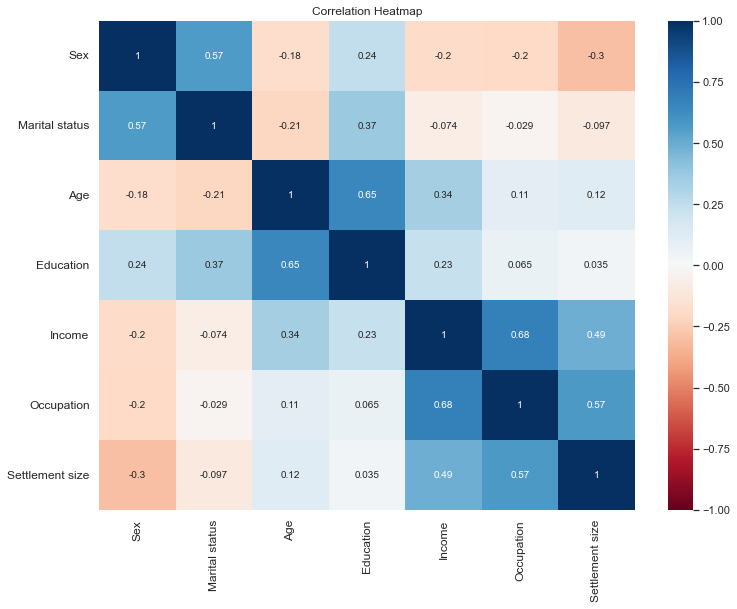

In [6]:
# We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding
# We use RdBu as a color scheme, but you can use viridis, Blues, YlGnBu or many others
# We set the range from -1 to 1, as it is the range of the Pearson Correlation
# Otherwise the function infers the boundaries from the input
# In this case they will be -0,25 to 0,68, as they are the minumum and maximum correlation indeces between our features
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_segmentation.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

4 - Standardization/Features Scaling

In [7]:
df_segmentation_std = df_segmentation.copy()

In [8]:
unscaled_inputs = df_segmentation_std[['Age', 'Income']]
unscaled_inputs

,Age,Income
ID,,
100000001,67,124670
100000002,22,150773
100000003,49,89210
100000004,45,171565
100000005,53,149031
...,...,...
100001996,47,123525
100001997,27,117744
100001998,31,86400


In [9]:
scaler = StandardScaler()
unscaled_inputs = scaler.fit_transform(unscaled_inputs)
unscaled_inputs

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

In [10]:
df_segmentation_std['Age'] = unscaled_inputs[:,0]
df_segmentation_std['Income'] = unscaled_inputs[:,1]

In [11]:
df_segmentation_std

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,2.653614,2,0.097524,1,2
100000002,1,1,-1.187132,1,0.782654,1,2
100000003,0,0,1.117316,1,-0.833202,0,0
100000004,0,0,0.775916,1,1.328386,1,1
100000005,0,0,1.458716,1,0.736932,1,1
...,...,...,...,...,...,...,...
100001996,1,0,0.946616,1,0.067471,0,0
100001997,1,1,-0.760382,1,-0.084265,1,0
100001998,0,0,-0.418983,0,-0.906957,0,0


In [12]:
df_segmentation_std.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2.000000e+03,2000.00000,2.000000e+03,2000.000000,2000.000000
mean,0.457000,0.496500,9.059420e-17,1.03800,1.563194e-16,0.810500,0.739000
std,0.498272,0.500113,1.000250e+00,0.59978,1.000250e+00,0.638587,0.812533
min,0.000000,0.000000,-1.528532e+00,0.00000,-2.234225e+00,0.000000,0.000000
25%,0.000000,0.000000,-7.603825e-01,1.00000,-6.113281e-01,0.000000,0.000000
50%,0.000000,0.000000,-2.482829e-01,1.00000,-1.418903e-01,1.000000,1.000000
75%,1.000000,1.000000,5.198664e-01,1.00000,4.492952e-01,1.000000,1.000000
max,1.000000,1.000000,3.421764e+00,3.00000,4.945225e+00,2.000000,2.000000


5 - K-Means Clustering - Clustering

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_segmentation_std)
    wcss.append(kmeans.inertia_)

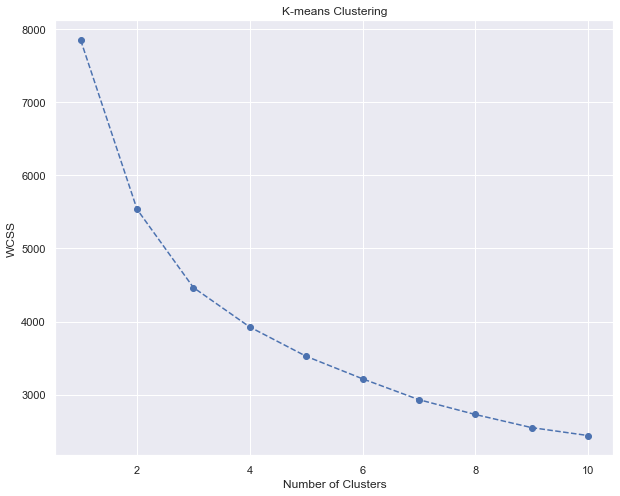

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [15]:
# We run K-means with a fixed number of clusters
# In our case - n_clusters = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_segmentation_std)
print(kmeans.labels_)

[1 3 1 ... 0 0 0]


In [16]:
df_segmentation['Segment K-means'] = kmeans.labels_
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,0
100001998,0,0,31,0,86400,0,0,0


6 - K-Means Clustering - Analysis

In [17]:
# Calculate mean values for different features grouped by the clusters
df_segmentation_analysis = df_segmentation.groupby(['Segment K-means']).mean()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.629962,0.563380,29.903969,0.839949,95266.202305,0.399488,0.020487
1,0.414925,0.423881,52.519403,1.671642,121298.423881,0.591045,0.528358
2,0.255814,0.400000,47.530233,1.474419,194777.060465,1.665116,1.520930
3,0.340807,0.485800,30.866966,0.811659,127046.179372,1.125561,1.431988


In [18]:
mean_list = np.array([df_segmentation['Sex'].mean(), df_segmentation['Marital status'].mean(),
        df_segmentation['Age'].mean(), df_segmentation['Education'].mean(), df_segmentation['Income'].mean(), 
        df_segmentation['Occupation'].mean(), df_segmentation['Settlement size'].mean()])
mean_list = pd.DataFrame(mean_list.reshape(1,7), columns=['Sex', 'Marital status', 'Age', 
                                                        'Education', 'Income', 'Occupation', 'Settlement size'])
mean_list.rename({0: "Average"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Average,0.457,0.4965,35.909,1.038,120954.419,0.8105,0.739


In [19]:
# Analysis
# Cluster 0 - highest number of female + highest number of non-single (male/single = 0, female/non-single = 1) => fewer opportunities
#           => lowest salary + lowest occupation + worst place of settlement
# Cluster 1 - highest age + highest education => career focused lives
# Cluster 2 - highest income + best occupation + best place of settlement => well off living
# Cluster 3 - avg income + above avg place of settlement => standard living

In [20]:
print(df_segmentation[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count())
# Sex = Number of Females
print(df_segmentation[['Segment K-means', 'Sex']].groupby(['Sex']).count())

                 Sex
Segment K-means     
0                781
1                335
2                215
3                669
     Segment K-means
Sex                 
0               1086
1                914


In [21]:
# M-2 GroupBy
# df.groupby(Column_1_name)[Column_2_name].method()
# Groups Column 2 from df wrt Column 1 and apply the method
print(df_segmentation.groupby(df_segmentation.columns.values[-1])[df_segmentation.columns.values[0]].count())
# df_segmentation.columns.values[0] => 'Sex'
# df_segmentation.columns.values[-1] => 'Segment K-means'
print(df_segmentation.groupby(df_segmentation.columns.values[0])[df_segmentation.columns.values[-1]].count())


Segment K-means
0    781
1    335
2    215
3    669
Name: Sex, dtype: int64
Sex
0    1086
1     914
Name: Segment K-means, dtype: int64


In [22]:
# Compute the size and proportions of the four clusters
df_segmentation_analysis['Number_Observation'] = df_segmentation[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
df_segmentation_analysis['Proportion_Observation'] = df_segmentation_analysis['Number_Observation'] / 2000
# df_segmentation_analysis['Number_Observation'].sum() => 2000
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number_Observation,Proportion_Observation
Segment K-means,,,,,,,,,
0,0.629962,0.563380,29.903969,0.839949,95266.202305,0.399488,0.020487,781,0.3905
1,0.414925,0.423881,52.519403,1.671642,121298.423881,0.591045,0.528358,335,0.1675
2,0.255814,0.400000,47.530233,1.474419,194777.060465,1.665116,1.520930,215,0.1075
3,0.340807,0.485800,30.866966,0.811659,127046.179372,1.125561,1.431988,669,0.3345


In [23]:
df_segmentation_analysis.rename({0:'Fewer Opportunities',
                            1:'Career Focused',
                            2:'Well Off',
                            3:'Standard Living'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number_Observation,Proportion_Observation
Segment K-means,,,,,,,,,
Fewer Opportunities,0.629962,0.563380,29.903969,0.839949,95266.202305,0.399488,0.020487,781,0.3905
Career Focused,0.414925,0.423881,52.519403,1.671642,121298.423881,0.591045,0.528358,335,0.1675
Well Off,0.255814,0.400000,47.530233,1.474419,194777.060465,1.665116,1.520930,215,0.1075
Standard Living,0.340807,0.485800,30.866966,0.811659,127046.179372,1.125561,1.431988,669,0.3345


In [24]:
# Analysis
# Most of our population are either Standard Living or Below Standard Living (Fewer Opportunities)

In [25]:
df_segmentation['Labels'] = df_segmentation['Segment K-means'].map({0: 'Fewer Opportunities',
                                                                    1: 'Career Focused',
                                                                    2: 'Well Off',
                                                                    3: 'Standard Living'})
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,1,Career Focused
100000002,1,1,22,1,150773,1,2,3,Standard Living
100000003,0,0,49,1,89210,0,0,1,Career Focused
100000004,0,0,45,1,171565,1,1,2,Well Off
100000005,0,0,53,1,149031,1,1,1,Career Focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,Career Focused
100001997,1,1,27,1,117744,1,0,0,Fewer Opportunities
100001998,0,0,31,0,86400,0,0,0,Fewer Opportunities


7 - Plot Graph - Age v Income

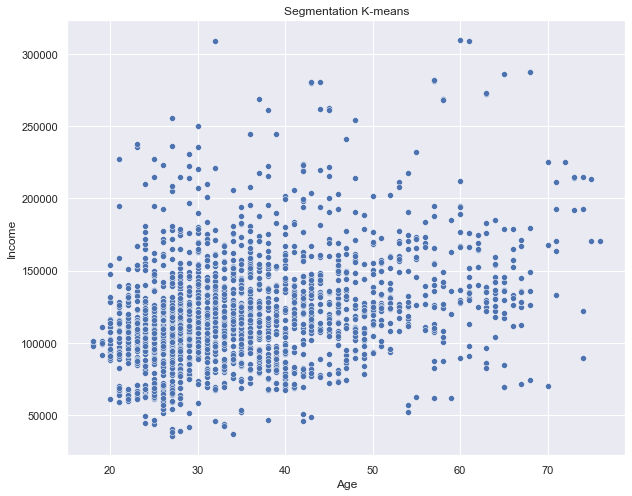

In [26]:
# Age and Income are both continuous variables => so we plot scatter plot
x_axis = df_segmentation['Age']
y_axis = df_segmentation['Income']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis)
plt.title('Segmentation K-means')
plt.show()

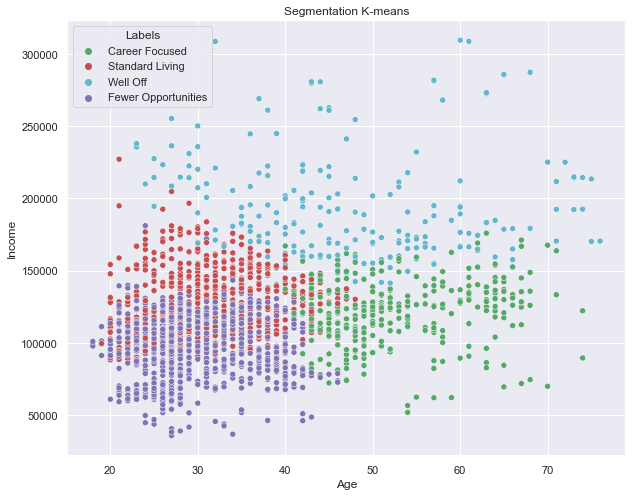

In [27]:
x_axis = df_segmentation['Age']
y_axis = df_segmentation['Income']
plt.figure(figsize=(10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue=df_segmentation['Labels'], palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [28]:
# Analysis
# People in Fewer Opportunities and Standard Living are of same age groups and very slight difference in income
# People in Career Focused have almost same income as people in Fewer Opportunities and Standard Living
# People in Well Off have highest income and are of all age groups
# Most people have income in the lower range

8 - Export CSV

In [ ]:
df_segmentation.to_csv("data-segmented.csv", sep=",", index=False)